In [2]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv("/content/creditcard.csv")



# New Section

In [4]:
%time
# Set your environment in a notebook:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
# pd.set_option('max_columns',None)
pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs

 Numpy: 1.23.5

 sklearn: 1.2.2


In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1100,854,-0.702358,0.547789,1.959636,1.006627,0.710589,-0.050154,0.577878,-0.035783,-0.491690,-0.028617,0.531448,0.178508,-0.893520,0.105988,-0.673170,-0.578506,-0.137982,0.403800,1.312553,0.152938,-0.076951,-0.033580,-0.397949,0.004681,0.540328,-0.231578,-0.101319,-0.158310,2.34,0.0
1826,1419,-1.304439,0.914605,1.713515,-0.038153,-0.187393,-0.206343,1.187419,-0.519306,0.472983,0.853970,1.269821,0.579540,-0.514101,-0.581945,-0.971994,-0.459678,-0.366962,-0.192152,0.603349,0.117154,-0.255861,-0.117827,-0.265450,0.565720,-0.133043,0.111577,-0.391596,-0.165854,84.39,0.0
152,95,-0.343711,1.118615,1.293386,0.064762,0.023481,-0.992741,0.695814,-0.064809,-0.373640,-0.506204,-0.234254,-0.150924,-0.018840,-0.401926,0.908912,0.388387,0.016678,-0.122331,-0.090106,0.104410,-0.265392,-0.700550,-0.014280,0.330615,-0.165442,0.072342,0.244882,0.098048,2.28,0.0
388,283,-0.529996,0.766554,1.759393,-1.160074,-0.501040,-1.404513,0.679279,-0.242594,0.520868,-0.117280,-0.000032,-0.320075,-0.886311,-0.176523,0.606221,0.426544,-0.568054,-0.496516,-0.982598,0.138236,-0.163031,-0.219408,0.016959,0.934128,-0.327383,0.668479,0.114264,-0.091385,2.31,0.0
974,737,-0.308847,0.105384,1.101975,-1.897448,-0.201232,-0.701166,0.317307,-0.019013,-1.516906,0.200591,0.737739,-0.718581,-0.742523,0.128828,-0.651994,1.477831,-0.317124,-0.586505,0.354758,0.038848,0.364867,0.824247,-0.205159,-0.003574,-0.125035,-0.333657,0.095643,0.125836,25.85,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [7]:
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Rows and Columns: 
 (1986, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21 

In [ ]:
df.nunique()

Time       9480
V1        13495
V2        13495
V3        13495
V4        13495
V5        13495
V6        13495
V7        13495
V8        13495
V9        13495
V10       13495
V11       13495
V12       13495
V13       13495
V14       13495
V15       13495
V16       13495
V17       13495
V18       13495
V19       13495
V20       13495
V21       13495
V22       13495
V23       13495
V24       13495
V25       13495
V26       13495
V27       13495
V28       13495
Amount     4674
Class         2
dtype: int64

In [ ]:
df.nunique().to_frame()

,0
Time,9480
V1,13495
V2,13495
V3,13495
V4,13495
V5,13495
V6,13495
V7,13495
V8,13495
V9,13495


# How to feature engineer the dataset when the column names are of unknown ?
# How do we handle negative values of the features

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
y.fillna(y.mean(), inplace=True)

In [ ]:
y = y.astype(int)

In [ ]:
X.Amount.fillna(X.Amount.mean(), inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Why is some of the models didn't work at all?

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SGD', SGDClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NearestCentroid', NearestCentroid()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTree', ExtraTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
# models.append(('ComplementNB', ComplementNB()))
# models.append(('MultinomialNB', MultinomialNB()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('NuSVC', NuSVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


LogisticRegression(solver='liblinear')

LR: 0.998477 (0.000573)
Score for each of the 10 K-fold tests:  [0.99820949 0.99731423 0.99910474 0.99910394 0.99820789 0.99910394
 0.99910394 0.99820789 0.99820789 0.99820789]
LogisticRegression(solver='liblinear')
	Training time: 0.334s
	Prediction time: 3.033s



SGDClassifier()

SGD: 0.996506 (0.001094)
Score for each of the 10 K-fold tests:  [0.99641898 0.99820949 0.99820949 0.99731183 0.99641577 0.99462366
 0.99551971 0.99551971 0.99641577 0.99641577]
SGDClassifier()
	Training time: 0.191s
	Prediction time: 2.344s



RidgeClassifier()

Ridge: 0.996596 (0.001489)
Score for each of the 10 K-fold tests:  [0.99731423 0.99820949 0.99641898 0.99820789 0.99551971 0.99462366
 0.99820789 0.99731183 0.9937276  0.99641577]
RidgeClassifier()
	Training time: 0.031s
	Prediction time: 0.242s



PassiveAggressiveClassifier()

PAC: 0.995879 (0.002012)
Score for each of the 10 K-fold tests:  [0.99641898 0.99820949 0.99820949 0.99731183 0.99641577 0.99462366
 0.99551971 0.99462366 0.99103943 0.99641577]
PassiveAggressiveClassifier()
	Training time: 0.134s
	Prediction time: 0.703s



Perceptron()

Perceptron: 0.995789 (0.002006)
Score for each of the 10 K-fold tests:  [0.99641898 0.99820949 0.99820949 0.99731183 0.99641577 0.99462366
 0.99551971 0.99462366 0.99103943 0.99551971]
Perceptron()
	Training time: 0.042s
	Prediction time: 0.445s



LinearDiscriminantAnalysis()

LDA: 0.998119 (0.001165)
Score for each of the 10 K-fold tests:  [0.99820949 0.99910474 0.99731423 1.         0.99910394 0.99820789
 0.99820789 0.99820789 0.99551971 0.99731183]
LinearDiscriminantAnalysis()
	Training time: 0.068s
	Prediction time: 0.874s



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA: 0.998477 (0.001270)
Score for each of the 10 K-fold tests:  [1.         0.99910474 0.99910474 1.         0.99820789 0.99551971
 0.99820789 0.99910394 0.99731183 0.99820789]
QuadraticDiscriminantAnalysis()
	Training time: 0.037s
	Prediction time: 0.301s



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


KNeighborsClassifier()

KNN: 0.996058 (0.002090)
Score for each of the 10 K-fold tests:  [0.99641898 0.99820949 0.99910474 0.99731183 0.99641577 0.99462366
 0.99551971 0.99551971 0.99103943 0.99641577]
KNeighborsClassifier()
	Training time: 0.008s
	Prediction time: 0.832s



NearestCentroid()

NearestCentroid: 0.595893 (0.013633)
Score for each of the 10 K-fold tests:  [0.60429722 0.6168308  0.61324978 0.58960573 0.60394265 0.59139785
 0.59318996 0.59229391 0.5672043  0.58691756]
NearestCentroid()
	Training time: 0.009s
	Prediction time: 0.083s



DecisionTreeClassifier()

CART: 0.998835 (0.001064)
Score for each of the 10 K-fold tests:  [1.         0.99731423 0.99910474 0.99910394 1.         0.99910394
 1.         0.99731183 0.99910394 0.99731183]
DecisionTreeClassifier()
	Training time: 0.214s
	Prediction time: 1.967s



ExtraTreeClassifier()

ExtraTree: 0.999015 (0.000482)
Score for each of the 10 K-fold tests:  [1.         0.99820949 0.99910474 0.99910394 0.99820789 0.99910394
 0.99910394 0.99910394 0.99910394 0.99910394]
ExtraTreeClassifier()
	Training time: 0.007s
	Prediction time: 0.077s



GaussianNB()

NB: 0.981815 (0.004534)
Score for each of the 10 K-fold tests:  [0.98119964 0.97851388 0.98746643 0.98207885 0.98835125 0.98655914
 0.97401434 0.98207885 0.98207885 0.97580645]
GaussianNB()
	Training time: 0.008s
	Prediction time: 0.079s



BernoulliNB()

BNB: 0.998029 (0.000965)
Score for each of the 10 K-fold tests:  [0.99820949 0.99910474 0.99731423 0.99820789 0.99910394 0.99820789
 0.99910394 0.99820789 0.99641577 0.99641577]
BernoulliNB()
	Training time: 0.017s
	Prediction time: 0.171s



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC: 0.996775 (0.001341)
Score for each of the 10 K-fold tests:  [0.99820949 0.99731423 0.99731423 0.99820789 0.99641577 0.99462366
 0.99820789 0.99462366 0.99551971 0.99731183]
LinearSVC()
	Training time: 0.235s
	Prediction time: 2.178s



RandomForestClassifier()

RF: 0.999552 (0.000601)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         0.99910394
 0.99910394 0.99910394 1.         0.99820789]
RandomForestClassifier()
	Training time: 2.322s
	Prediction time: 22.303s



GradientBoostingClassifier()

GB: 0.998656 (0.001219)
Score for each of the 10 K-fold tests:  [0.99910474 0.99731423 0.99910474 0.99820789 1.         0.99910394
 1.         0.99641577 1.         0.99731183]
GradientBoostingClassifier()
	Training time: 11.535s
	Prediction time: 116.031s



ExtraTreesClassifier()

ExtraTrees: 0.999462 (0.000594)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         0.99910394
 0.99910394 0.99910394 0.99910394 0.99820789]
ExtraTreesClassifier()
	Training time: 0.358s
	Prediction time: 3.724s



BaggingClassifier()

Bagging: 0.999104 (0.000801)
Score for each of the 10 K-fold tests:  [0.99910474 0.99820949 1.         1.         1.         0.99910394
 1.         0.99820789 0.99820789 0.99820789]
BaggingClassifier()
	Training time: 0.986s
	Prediction time: 8.968s



AdaBoostClassifier()

AdaBoost: 0.999014 (0.000845)
Score for each of the 10 K-fold tests:  [1.         1.         0.99910474 0.99910394 1.         0.99910394
 0.99910394 0.99820789 0.99731183 0.99820789]
AdaBoostClassifier()
	Training time: 2.389s
	Prediction time: 24.838s



MLPClassifier()

MLP: 0.996954 (0.001280)
Score for each of the 10 K-fold tests:  [0.99820949 0.99820949 0.99820949 0.99641577 0.99910394 0.99551971
 0.99641577 0.99641577 0.99551971 0.99551971]
MLPClassifier()
	Training time: 3.300s
	Prediction time: 14.005s



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

XGBoost: 0.999373 (0.000700)
Score for each of the 10 K-fold tests:  [1.         0.99910474 1.         1.         1.         0.99910394
 0.99910394 0.99820789 1.         0.99820789]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
	Training time: 2.240s
	Prediction time: 11.147s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7810d32ae380>,
 'caps': [<matplotlib.lines.Line2D at 0x7810d32ae8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810d32ae0e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7810d32aee00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7810d32af0a0>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'SGD'),
 Text(3, 0, 'Ridge'),
 Text(4, 0, 'PAC'),
 Text(5, 0, 'Perceptron'),
 Text(6, 0, 'LDA'),
 Text(7, 0, 'QDA'),
 Text(8, 0, 'KNN'),
 Text(9, 0, 'NearestCentroid'),
 Text(10, 0, 'CART'),
 Text(11, 0, 'ExtraTree'),
 Text(12, 0, 'NB'),
 Text(13, 0, 'BNB'),
 Text(14, 0, 'LinearSVC'),
 Text(15, 0, 'RF'),
 Text(16, 0, 'GB'),
 Text(17, 0, 'ExtraTrees'),
 Text(18, 0, 'Bagging'),
 Text(19, 0, 'AdaBoost'),
 Text(20, 0, 'MLP'),
 Text(21, 0, 'XGBoost')]

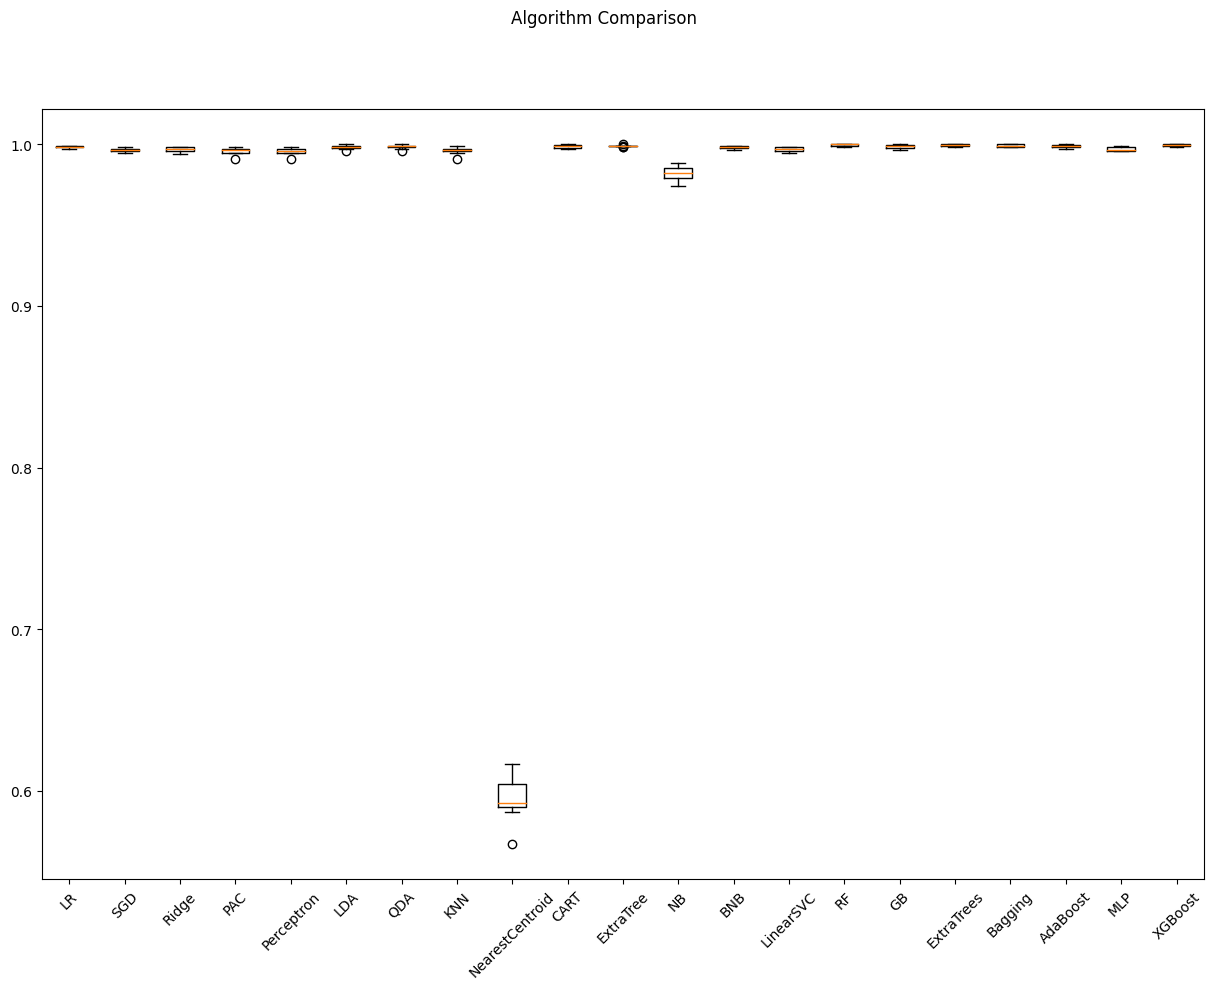

In [ ]:
# Scoring metrics:
# 'accuracy', 'balanced_accuracy', 'average_precision', 'neg_brier_score', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
# 'neg_log_loss', 'precision', 'recall', 'jaccard', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

fig = plt.figure(figsize=(15, 10))  # Change the numbers as needed
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)  # Added rotation for better visibility
plt.show()

In [ ]:
y.unique()

# What do we infer from above diagram